In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender.proximal:Total parents: 9
INFO:lsst.meas.deblender.proximal:Unblended sources: 4
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 5


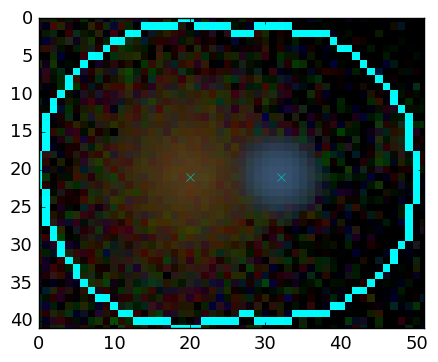

In [29]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test1/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test1/det_merge.fits")
simFilename = os.path.join(dataPath, "test1/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
#display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
#condition = expDb.mergedTable["peaks"]==4
condition = (expDb.mergedTable["peaks"]>=2) & (expDb.mergedTable["peaks"]<=5)# & (expDb.mergedTable["peaks"]<10)
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=condition, contrast=1)
deblend = proximal.DeblendedParent(expDb, footprint, peaks)

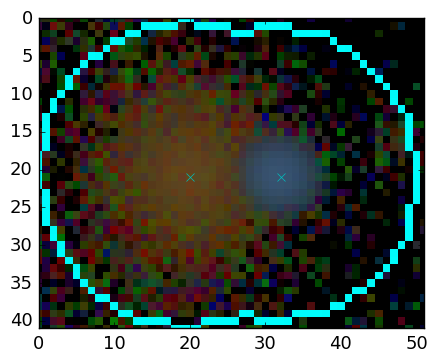

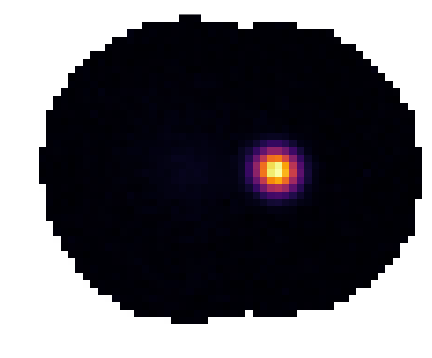

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:499 iterations
INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -3.21871757507 to 138.013381958
INFO:lsst.meas.deblender.proximal:Max difference: 19.1267381281
INFO:lsst.meas.deblender.proximal:Residual difference 12.4%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -3.21871757507 to 138.013381958
INFO:lsst.meas.deblender.proximal:Max difference: 14.2969203384
INFO:lsst.meas.deblender.proximal:Residual difference 6.1%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas.

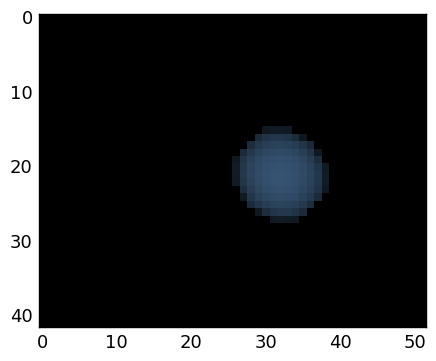

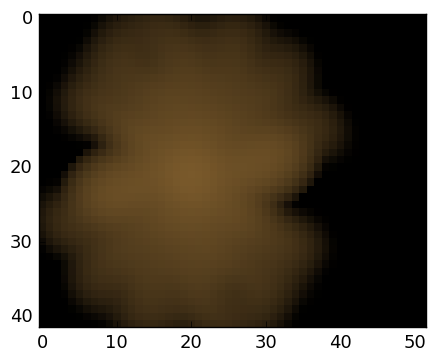

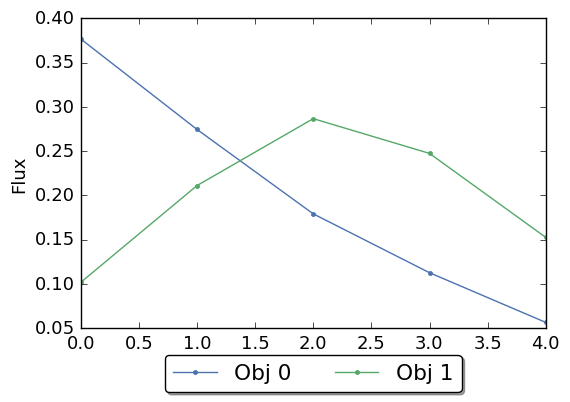

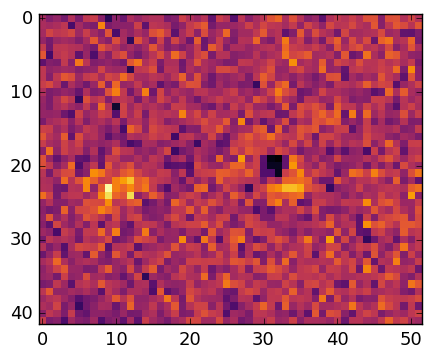

CPU times: user 10.9 s, sys: 197 ms, total: 11.1 s
Wall time: 11.1 s


In [42]:
%time glmm = expDb.deblendParent(parentIdx=0, condition=condition, display=True, maxiter=500, constraints='MS', nonSymmetricFill=0, algorithm="GLMM", usePsf=True, psfThresh=3e-3, l0_thresh=.05)

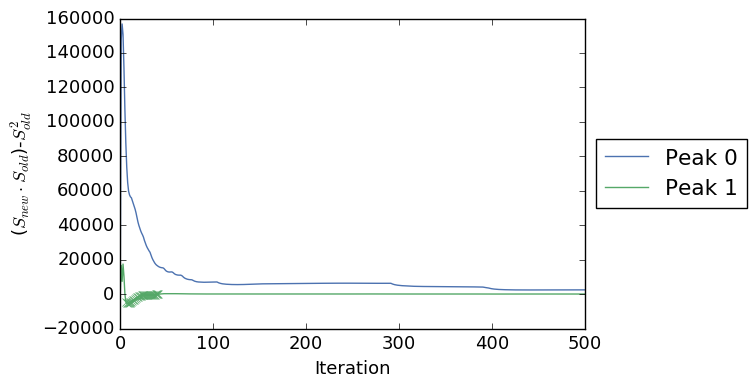

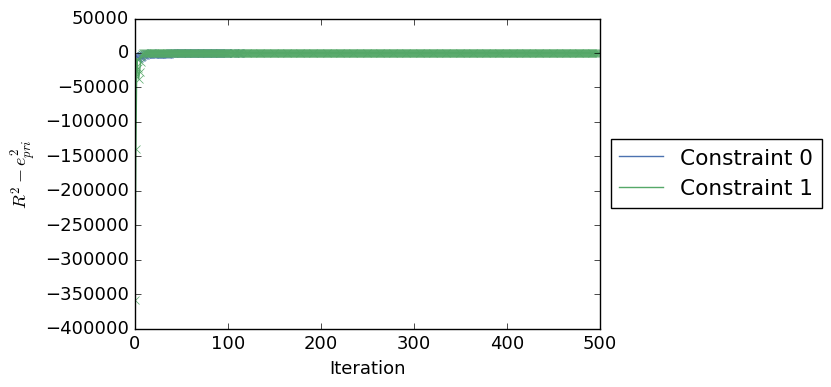

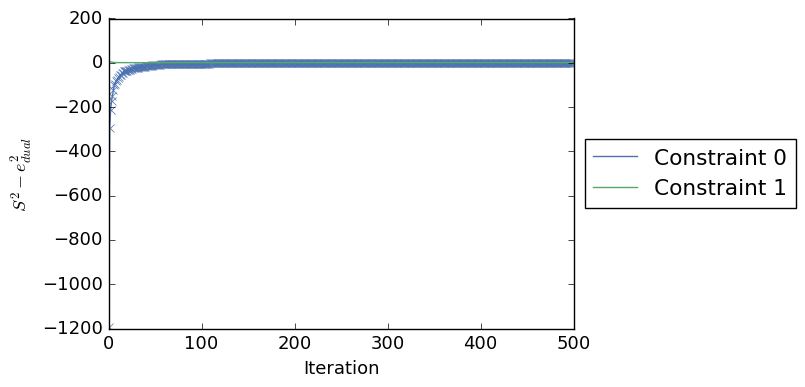

In [43]:
glmm.convergencePlots()

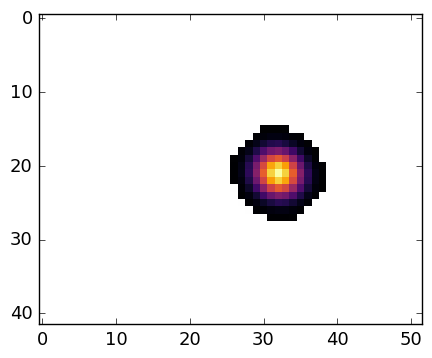

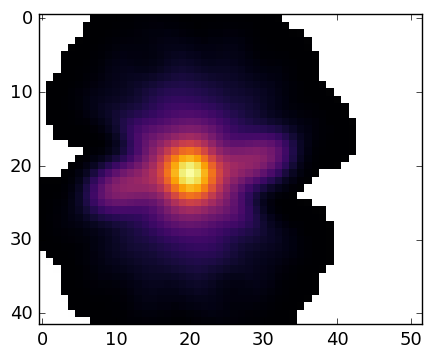

In [44]:
glmm.displayAllImages(0)

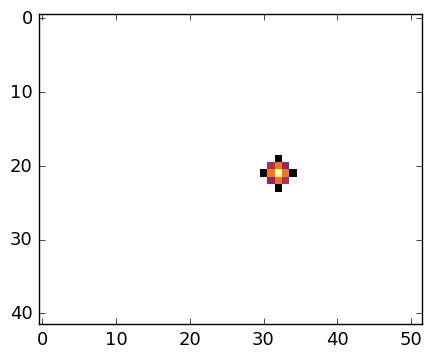

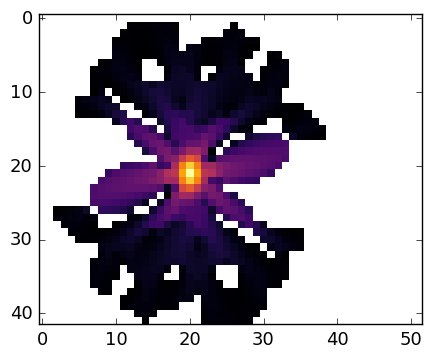

In [45]:
glmm.displayAllImages(imgType='intensity')

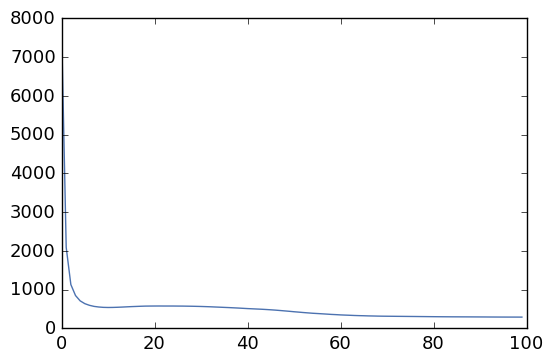

In [7]:
# Save this, it took a while to create
# The point: NMF converges after 100 iterations
plt.plot(glmm.frobenius[:100])